# Model Output Notebook
## Hurricane Ophelia
<img style="float:right;" src="DewberryLogo_RGB.png" width=150px>

### ADCIRC-SWAN Ouput
#### - Steps to follow:
  1. Import Libraries & Assign Paths
  2. Assign Tasks
  3. Save Report

### Description
Read data from ADCIRC output files and plot

---

#### - Requirements
  1. Dewberry ADCIRC Python Library (Python 3.6)
  2. ADCIRC Output Files
  
#### - Usage:
  1. Import Libraries & Assign Paths
  2. Read in data from files:
  3. Add comments/Request feedback
  4. Save Report
  
 ---

### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc4
import os
from adcpy import adcirc
from adcpy import swan
from adcpy import utils
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from IPython.display import HTML
import plotly.graph_objs as go
import plotly.offline as po

### Assign Paths and Variables

In [2]:
qc_staff = 'Tyler Miesse'
root_dir = r'N:\TECH\COASTAL\NC_STORM_SURGE_MODELING_UPDATE\SurgeModeling\Validation\2005Ophelia\ophelia2'
files = utils.output_files(root_dir)

### Timeseries Beaufort

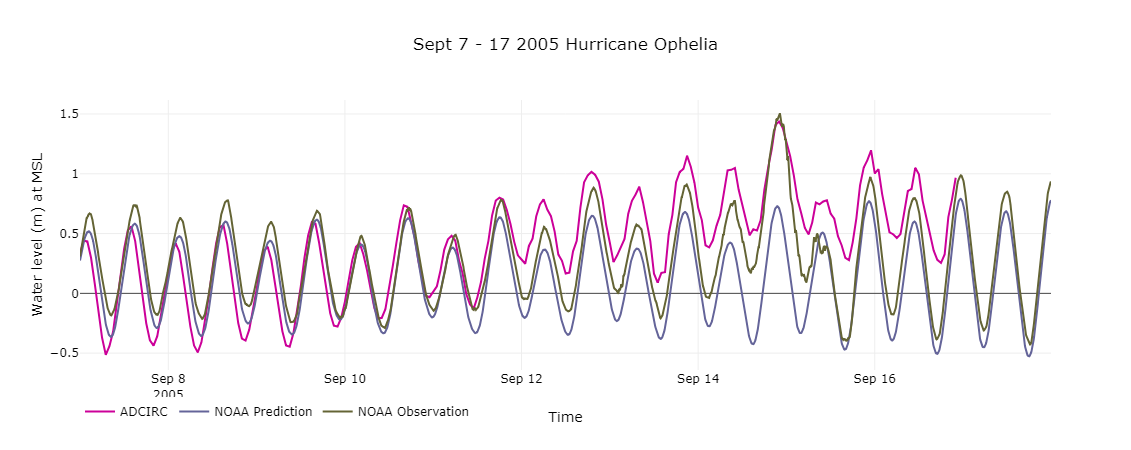

In [3]:
nc_file = nc4.Dataset(files[2])
init_notebook_mode()
start,freq = '20050907 00:00:00','1H'
station,name = 629653,' Prediction'
table = utils.timeseries(nc_file,start,freq,station,name)
start,end,noaa = '20050907','20050917','8656483'
data = utils.plot_timeseries(table,start,end,noaa)
title,x,y = 'Sept 7 - 17 2005 Hurricane Ophelia','Time','Water level (m) at MSL'
layout=utils.layout(title,x,y)
fig = go.Figure(data=data, layout=layout)
interactive = iplot(fig)
#po.plot(fig,filename=root_dir+'\\'+'beaufort_ophelia.html')

---
##### <font color='blue'>Comments: (date if applicable)</font> 
---

##### <font color='blue'>Response</font>
---

### Timeseries Wrightsville

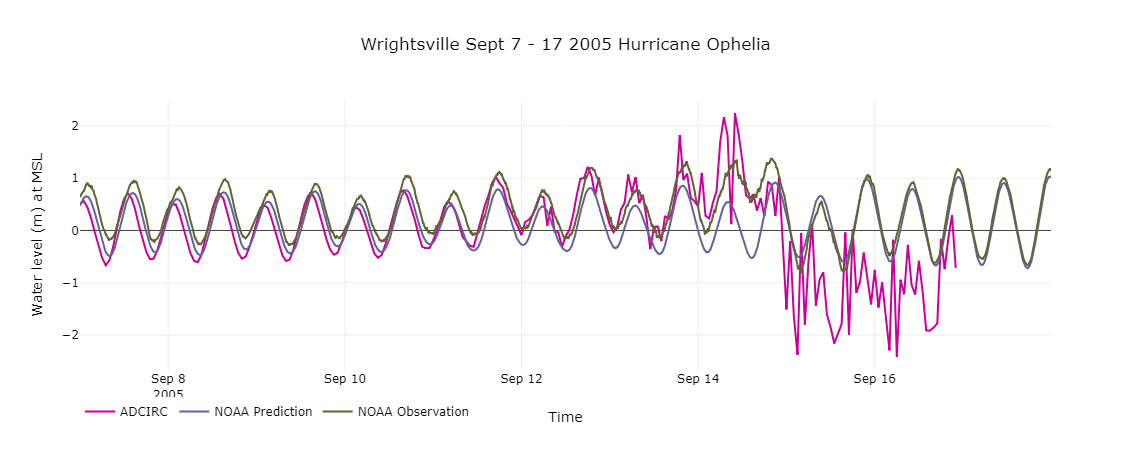

In [4]:
nc_file = nc4.Dataset(files[2])
start,freq,station,name = '20050907 00:00:00','1H',102707,' Prediction'
table = utils.timeseries(nc_file,start,freq,station,name)
start,end,noaa = '20050907','20050917','8658163'
data = utils.plot_timeseries(table,start,end,noaa)
title,x,y = 'Wrightsville Sept 7 - 17 2005 Hurricane Ophelia','Time','Water level (m) at MSL'
layout=utils.layout(title,x,y)
fig = go.Figure(data=data, layout=layout)
interactive = iplot(fig)
#po.plot(fig,filename=root_dir+'\\'+'beaufort_ophelia.html')

---
##### <font color='blue'>Comments: (date if applicable)</font> This is a node closest to the Wrightsville station
---

##### <font color='blue'>Response</font>
---

### Timeseries Wilmington

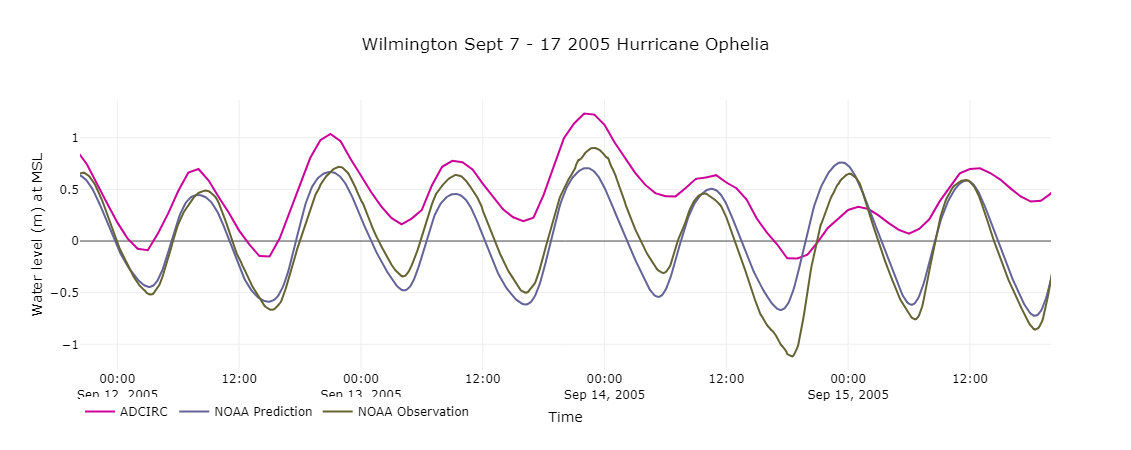

In [5]:
nc_file = nc4.Dataset(files[2])
start,freq,station,name = '20050907 00:00:00','1H',567933,' Prediction'
table = utils.timeseries(nc_file,start,freq,station,name)
start,end,noaa = '20050907','20050917','8658120'
data = utils.plot_timeseries(table,start,end,noaa)
title,x,y = 'Wilmington Sept 7 - 17 2005 Hurricane Ophelia','Time','Water level (m) at MSL'
layout=utils.layout(title,x,y)
fig = go.Figure(data=data, layout=layout)
interactive = iplot(fig)
#po.plot(fig,filename=root_dir+'\\'+'beaufort_ophelia.html')

---
##### <font color='blue'>Comments: (date if applicable)</font> 
---

##### <font color='blue'>Response</font>
---

### Timeseries Duck

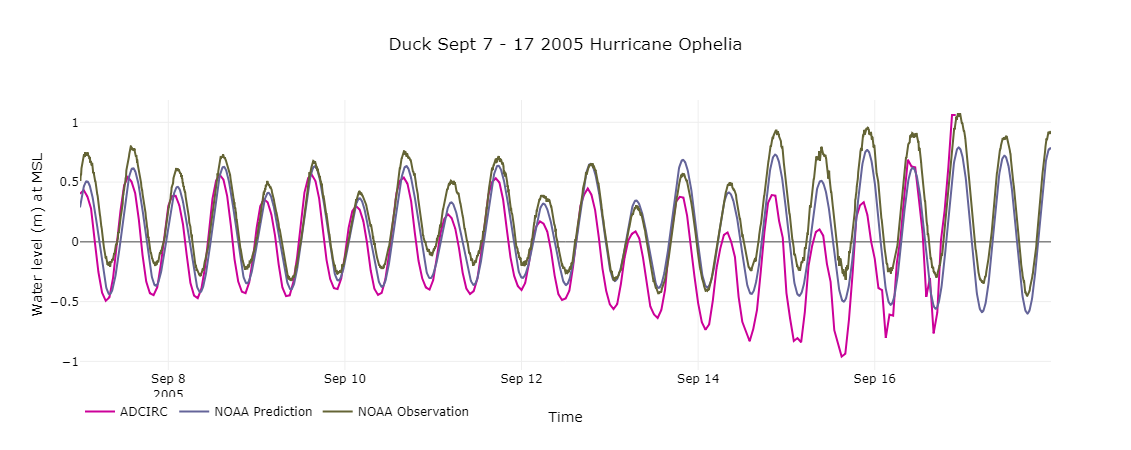

In [6]:
nc_file = nc4.Dataset(files[2])
start,freq,station,name = '20050907 00:00:00','1H',58949,' Prediction'#
table = utils.timeseries(nc_file,start,freq,station,name)
start,end,noaa = '20050907','20050917','8651370'
data = utils.plot_timeseries(table,start,end,noaa)
title,x,y = 'Duck Sept 7 - 17 2005 Hurricane Ophelia','Time','Water level (m) at MSL'
layout=utils.layout(title,x,y)
fig = go.Figure(data=data, layout=layout)
interactive = iplot(fig)
#po.plot(fig,filename=root_dir+'\\'+'beaufort_ophelia.html')

---
##### <font color='blue'>Comments: (date if applicable)</font> 
---

##### <font color='blue'>Response</font>
---

## Plot Global Outputs from the model 
*Customize Bounding boxes for each parameter as needed*


#### Water surface elevation within the study area

In [3]:
title = 'Water Level'
lat1,lat2 = 34.6, 34.9
lon1,lon2 = -76.9, -76.4
file1 = nc4.Dataset(f63)
hours = 238
levels = np.arange(-3, 14, 1)
start = '2005090700'
adcirc.global_water(root_dir,file1,title,hours,levels,lon1,lon2,lat1,lat2,start)
HTML('<img width="800" height="600" src="gifs\WaterLevel.gif" frameborder="0" allowfullscreen></img>')

---
##### <font color='blue'>Comments: (date if applicable)</font> 
---

##### <font color='blue'>Response</font>
---

#### Max Water surface elevation in the study area

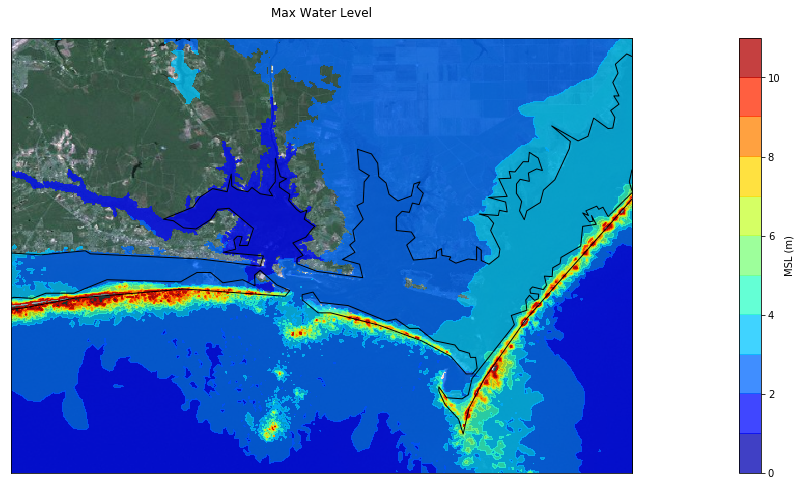

In [4]:
title = 'Max Water Level'
lat1,lat2 = 34.55, 34.9
lon1,lon2 = -76.9, -76.4
file1 = nc4.Dataset(files[6])
levels = np.arange(0, 12, 1)
fig,ax=plt.subplots(figsize=(48,8))
adcirc.adcirc.max_water(root_dir,file1,ax,title,levels,lon1,lon2,lat1,lat2)

---
##### <font color='blue'>Comments: (date if applicable)</font> 
---

##### <font color='blue'>Response</font>
---

In [3]:
title = 'Wave Height'
lat1,lat2 = 34.5, 35
lon1,lon2 = -77, -76.3
file1 = nc4.Dataset(files[10])
hours = 238
levels = np.arange(0, 11, 1)
start = '2005090700'
swan.swan.swan_HS(root_dir,file1,title,hours,levels,lon1,lon2,lat1,lat2,start)
HTML('<img width="800" height="600" src="gifs\swan_waves.gif" frameborder="0" allowfullscreen></img>')

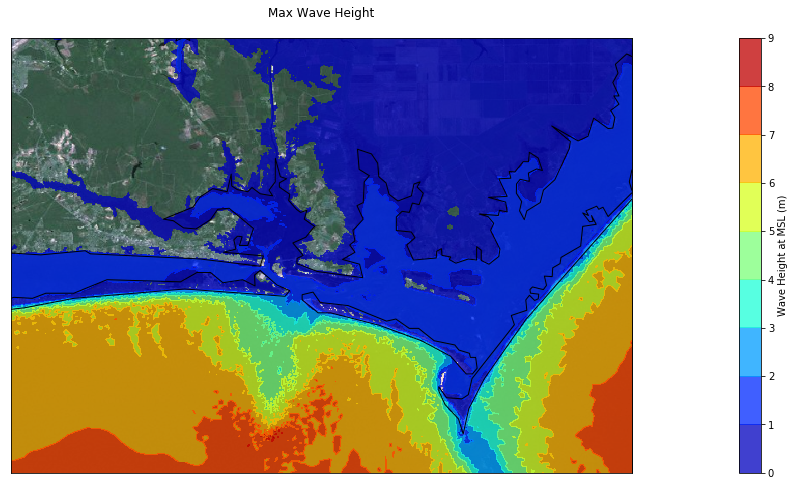

In [20]:
title = 'Max Wave Height'
lat1,lat2 = 34.55, 34.9
lon1,lon2 = -76.9, -76.4
file1 = nc4.Dataset(files[11])
levels = np.arange(0, 10, 1)
fig,ax=plt.subplots(figsize=(48,8))
swan.swan.max_swan_HS(root_dir,file1,ax,title,levels,lon1,lon2,lat1,lat2)

---
##### <font color='blue'>Comments: (date if applicable)</font> 
---

##### <font color='blue'>Response</font>
---

In [ ]:
title = 'SWAN Waves and Directions'
lat1,lat2 = 34.55, 34.9
on1,lon2 = -76.9, -76.4
file3 = nc4.Dataset(swan_hs)
ile4 = nc4.Dataset(swan_dir)
hours,space = 238, 25
start = '2005090700'
levels = np.arange(0, 11, 1)
adcirc.swan(root_dir,file3,file4,title,hours,levels,lon1,lon2,lat1,lat2,space,start)
HTML('<img width="700" height="500" src="gifs\swan.gif" frameborder="0" allowfullscreen></img>')

#### Depth-averaged Velocities within the study area

In [ ]:
title = 'Depth-averaged Velocity Magnitude'
lat1,lat2 = 34, 35
lon1,lon2 = -77.25, -76.25
file2 = nc4.Dataset(files[3])
hours = 238
start = '2005090700'
levels = np.arange(0, 36, 3)
adcirc.adcirc.global_velocity_mag(root_dir,file2,title,hours,levels,lon1,lon2,lat1,lat2,start)
HTML('<img width="800" height="600" src="gifs\VelocityMag.gif" frameborder="0" allowfullscreen></img>')

---
##### <font color='blue'>Comments: (date if applicable)</font> 
---

##### <font color='blue'>Response</font>
---

#### Max Depth-averaged velocity in the study area

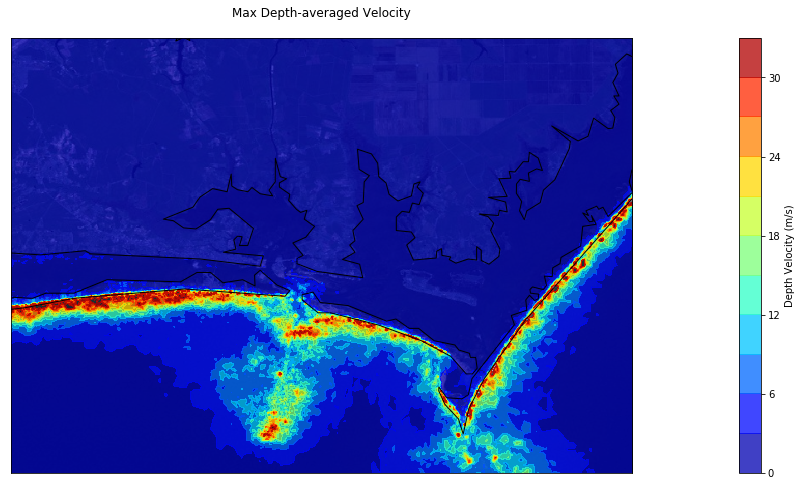

In [11]:
title = 'Max Depth-averaged Velocity'
lat1,lat2 = 34.55, 34.9
lon1,lon2 = -76.9, -76.4
file1 = nc4.Dataset(files[8])
levels = np.arange(0.0, 36, 3)
fig,ax=plt.subplots(figsize=(48,8))
adcirc.adcirc.max_velocity(root_dir,file1,ax,title,levels,lon1,lon2,lat1,lat2)

---
##### <font color='blue'>Comments: (date if applicable)</font> 
---

##### <font color='blue'>Response</font>
---

#### Max Wave radiation stress in the study area

#### Atmospheric Pressure and Wind within the study area

In [8]:
title = 'Atmoshperic Pressure and Wind'
lat1,lat2 = 32, 35
lon1,lon2 = -78, -75
file3 = nc4.Dataset(f73)
file4 = nc4.Dataset(f74)
hours,space = 238, 25
start = '2005090700'
levels = np.arange(9.5,10.6, 0.1)
adcirc.pressure_wind(root_dir,file3,file4,title,hours,levels,lon1,lon2,lat1,lat2,start,space)
HTML('<img width="700" height="500" src="gifs\PressureWind.gif" frameborder="0" allowfullscreen></img>')

---
##### <font color='blue'>Comments: (date if applicable)</font> 
---

##### <font color='blue'>Response</font>
---

#### Atmospheric Pressure within the study area

In [9]:
title = 'Atmospheric Pressure'
lat1,lat2 = 34.55, 34.9
lon1,lon2 = -76.9, -76.4
file3 = nc4.Dataset(f73)
hours = 238
start = '2005090700'
levels = np.arange(9.6,10.5, 0.1)
adcirc.global_pressure(root_dir,file3,title,hours,levels,lon1,lon2,lat1,lat2,start)
HTML('<img width="700" height="500" src="gifs\AtmosphericPressure.gif" frameborder="0" allowfullscreen></img>')

---
##### <font color='blue'>Comments: (date if applicable)</font> 
---

##### <font color='blue'>Response</font>
---

#### Min Pressure in the study area

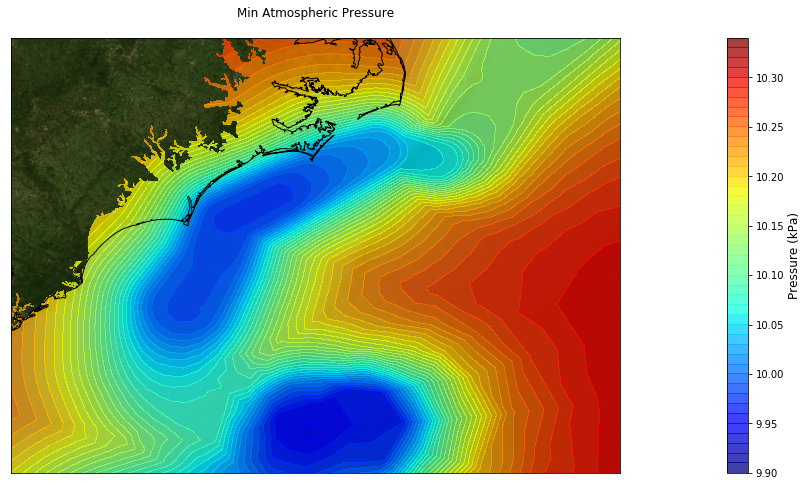

In [22]:
title = 'Min Atmospheric Pressure'
lat1,lat2 = 31, 36
lon1,lon2 = -80, -73
file1 = nc4.Dataset(files[9])
levels = np.arange(9.9, 10.35, 0.01)
fig,ax=plt.subplots(figsize=(48,8))
adcirc.adcirc.min_pressure(root_dir,file1,ax,title,levels,lon1,lon2,lat1,lat2)

---
##### <font color='blue'>Comments: (date if applicable)</font> 
---

##### <font color='blue'>Response</font>
---

#### Wind Stress or Velocity within the study area

In [3]:
title = 'Wind Magnitude'
lat1,lat2 = 33.75, 35
lon1,lon2 = -77.5, -76
hours = 238
start = '2005090700'
file4 = nc4.Dataset(files[5])
levels = np.arange(0, 40, 2)
adcirc.adcirc.global_wind_mag(root_dir,file4,title,hours,levels,lon1,lon2,lat1,lat2,start)
HTML('<img width="700" height="500" src="gifs\WindMag.gif" frameborder="0" allowfullscreen></img>')

---
##### <font color='blue'>Comments: (date if applicable)</font> 
---

##### <font color='blue'>Response</font>
---

#### Max Wind Velocities within the study area

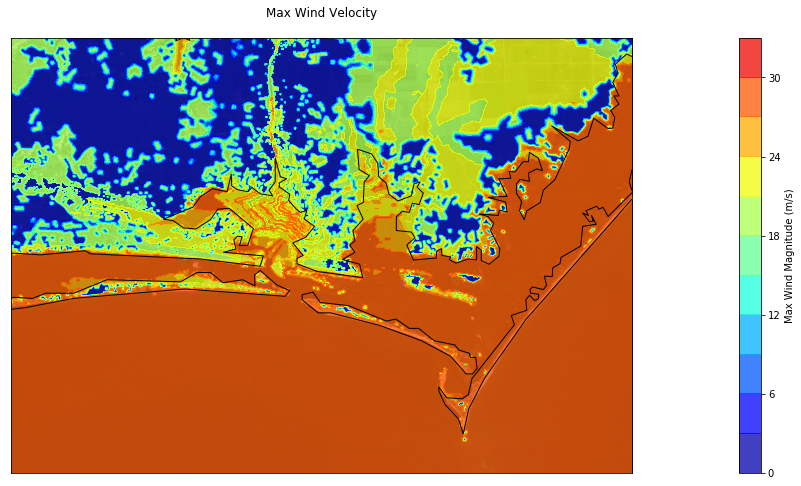

In [4]:
title = 'Max Wind Velocity'
lat1,lat2 = 34.55, 34.9
lon1,lon2 = -76.9, -76.4
file1 = nc4.Dataset(max_wv63)
levels = np.arange(0, 36, 3)
fig,ax=plt.subplots(figsize=(48,8))
adcirc.max_wind(root_dir,file1,ax,title,levels,lon1,lon2,lat1,lat2)

---
##### <font color='blue'>Comments: (date if applicable)</font> 
---

##### <font color='blue'>Response</font>
---

In [4]:
# Assign date of QC & Name/Info of QC Staff
qc_date = datetime.now()
print('Completed on {} by {}, awaiting responses'.format(qc_date, qc_staff))

Completed on 2018-08-20 10:22:23.661450 by Tyler Miesse, awaiting responses
